In [15]:
import tensorflow as tf

from tensorflow.keras.applications import inception_v3

pre_trained_model = tf.keras.applications.InceptionV3(
                                include_top = False, 
                                weights = 'imagenet',
                                input_shape=(150,150,3))

for layer in pre_trained_model.layers:
  layer.trainable = False


pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [16]:
modelFE = tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(9, activation='softmax')
])

In [17]:
modelFE.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 3, 3, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 4617      
Total params: 31,245,097
Trainable params: 9,442,313
Non-trainable params: 21,802,784
_________________________________________________________________


In [18]:
import os

base_dir = "C:/Users/ferga/Documents/Python/hojas"

train_dir =      os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir =       os.path.join(base_dir, 'test')

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=160,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
validation_datagen  = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))     

validation_generator =  validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))


test_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=32,
                                                         class_mode  = 'categorical',
                                                         target_size = (150, 150))

Found 5623 images belonging to 9 classes.
Found 1872 images belonging to 9 classes.
Found 1877 images belonging to 9 classes.


In [21]:
modelFE.compile(loss='categorical_crossentropy',
              optimizer= 'sgd',
              metrics=['accuracy'])

In [22]:
batch_size = 32
steps_per_epoch = train_generator.n // batch_size
validation_steps = validation_generator.n // batch_size

print (steps_per_epoch)
print (validation_steps)

175
58


In [23]:
history = modelFE.fit(
    train_generator, 
    steps_per_epoch= steps_per_epoch,
    epochs=40,
    validation_data=validation_generator,
    validation_steps= validation_steps,
    verbose=1)

Epoch 1/40
175/175 [==============================] - 50s 270ms/step - loss: 1.7789 - accuracy: 0.4396 - val_loss: 1.3633 - val_accuracy: 0.5253
Epoch 2/40
175/175 [==============================] - 48s 275ms/step - loss: 1.4029 - accuracy: 0.4963 - val_loss: 1.3519 - val_accuracy: 0.5156
Epoch 3/40
175/175 [==============================] - 53s 300ms/step - loss: 1.3543 - accuracy: 0.5092 - val_loss: 1.3070 - val_accuracy: 0.5259
Epoch 4/40
175/175 [==============================] - 55s 313ms/step - loss: 1.3264 - accuracy: 0.5133 - val_loss: 1.2670 - val_accuracy: 0.5447
Epoch 5/40
175/175 [==============================] - 63s 359ms/step - loss: 1.2982 - accuracy: 0.5343 - val_loss: 1.2517 - val_accuracy: 0.5458
Epoch 6/40
175/175 [==============================] - 67s 384ms/step - loss: 1.2908 - accuracy: 0.5303 - val_loss: 1.2313 - val_accuracy: 0.5609
Epoch 7/40
175/175 [==============================] - 66s 379ms/step - loss: 1.2597 - accuracy: 0.5389 - val_loss: 1.2128 - val_ac

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

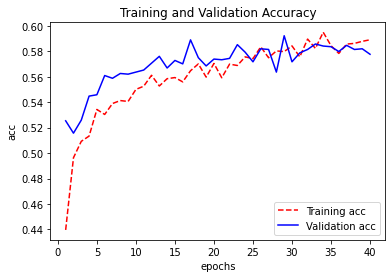

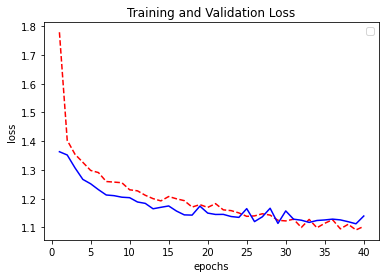

<Figure size 432x288 with 0 Axes>

In [24]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs    = range(1,len(acc)+1,1) # obtener número de epochs del eje X

plt.plot  ( epochs,     acc, 'r--', label='Training acc'  )
plt.plot  ( epochs, val_acc,  'b', label='Validation acc')
plt.title ('Training and Validation Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')

plt.legend()
plt.figure()


plt.plot  ( epochs,     loss, 'r--' )
plt.plot  ( epochs, val_loss ,  'b' )
plt.title ('Training and Validation Loss'   )
plt.ylabel('loss')
plt.xlabel('epochs')

plt.legend()
plt.figure()